In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nltk.download('stopwords')
nltk.download('words')
stopwords_nltk = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
def mostrar_frecuencias(datos):
    tokens_concatenate=np.concatenate(datos['tokens'])
    fdist = nltk.FreqDist(tokens_concatenate)
    topwords = fdist.most_common(20)
    x,y = zip(*topwords)
    print('Numero de tokens:',len(fdist))
    for i,token in enumerate(topwords[0:20]):
        print(i+1,token)
    plt.figure(figsize=(8,6))
    plt.bar(x,y)
    plt.xticks(rotation=90)
    plt.show()

In [6]:
%time datos = pd.read_csv('data_clean.csv').rename(columns={'ticket':'tokens'})

Wall time: 21 ms


In [7]:
datos

,categorias,tokens,etiquetas
0,Audit,address i have moved to address yakima st nw m...,0
1,Audit,testing system,0
2,Audit,testing system,0
3,Audit,time audit request afternoon would please prov...,0
4,Audit,time audit morning would provide a time audit ...,0
...,...,...,...
2851,Year-End,l w follow up name l ee id terminated verified...,4
2852,Year-End,e w inquiry name ee id verified dob yes phone ...,4
2853,Year-End,v ee id w discrepancy name v ee id ssn confirm...,4
2854,Year-End,v w inquiry name v ee id verified ssn yes phon...,4


In [8]:
# tokenizacion
%time datos['tokens']=datos['tokens'].apply(nltk.word_tokenize)

Wall time: 730 ms


Numero de tokens: 7799
1 ('to', 7792)
2 ('and', 4561)
3 ('this', 3335)
4 ('email', 3256)
5 ('a', 3077)
6 ('from', 2824)
7 ('is', 2474)
8 ('he', 2414)
9 ('of', 2384)
10 ('for', 2331)
11 ('it', 2249)
12 ('i', 2196)
13 ('please', 2069)
14 ('in', 1843)
15 ('an', 1535)
16 ('on', 1485)
17 ('not', 1451)
18 ('his', 1427)
19 ('us', 1420)
20 ('e', 1364)


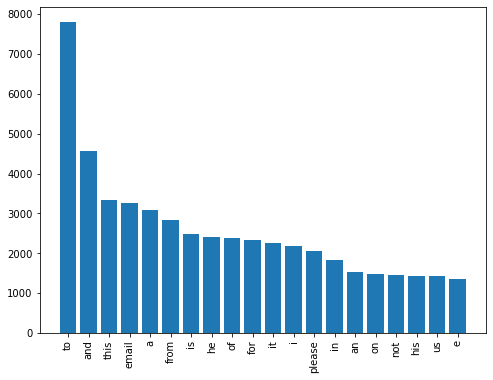

Wall time: 453 ms


In [9]:
%time mostrar_frecuencias(datos)

In [10]:
# limpieza de tokens
def limpiar_tokens(tokens):
    tokens=[re.sub(r'[^A-Za-z0-9]+',' ',token) for token in tokens]
    tokens=[token.lower() for token in tokens if len(token)>2]
    tokens=[token for token in tokens if token not in stopwords_nltk]
    return tokens

%time datos['tokens']=datos['tokens'].apply(limpiar_tokens)

Wall time: 305 ms


Numero de tokens: 7301
1 ('email', 3256)
2 ('please', 2069)
3 ('send', 1230)
4 ('phone', 1192)
5 ('group', 1187)
6 ('number', 1118)
7 ('receiving', 1033)
8 ('stop', 997)
9 ('emails', 988)
10 ('unsubscribe', 973)
11 ('information', 926)
12 ('name', 893)
13 ('verified', 891)
14 ('lafargeholcim', 829)
15 ('address', 828)
16 ('com', 818)
17 ('info', 796)
18 ('www', 796)
19 ('mail', 770)
20 ('ssn', 759)


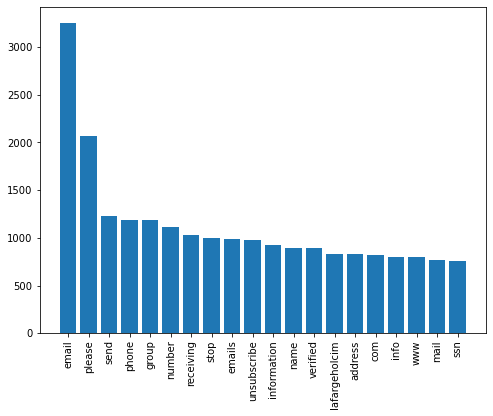

Wall time: 385 ms


In [11]:
%time mostrar_frecuencias(datos)

In [12]:
tag_dict = {
    "J": nltk.corpus.wordnet.ADJ,
    "N": nltk.corpus.wordnet.NOUN,
    "V": nltk.corpus.wordnet.VERB,
    "R": nltk.corpus.wordnet.ADV
}

lemmatizer = nltk.stem.WordNetLemmatizer()
noun=nltk.corpus.wordnet.NOUN
%time datos['tokens']=datos['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token, tag_dict.get(nltk.pos_tag([token])[0][1][0].upper(), noun)) for token in tokens])

Wall time: 57.4 s


Numero de tokens: 6454
1 ('email', 4270)
2 ('please', 2069)
3 ('receive', 1826)
4 ('send', 1274)
5 ('phone', 1195)
6 ('group', 1189)
7 ('number', 1152)
8 ('name', 1150)
9 ('stop', 1018)
10 ('unsubscribe', 973)
11 ('verify', 955)
12 ('information', 926)
13 ('request', 900)
14 ('address', 856)
15 ('lafargeholcim', 829)
16 ('benefit', 829)
17 ('com', 818)
18 ('mail', 799)
19 ('info', 796)
20 ('www', 796)


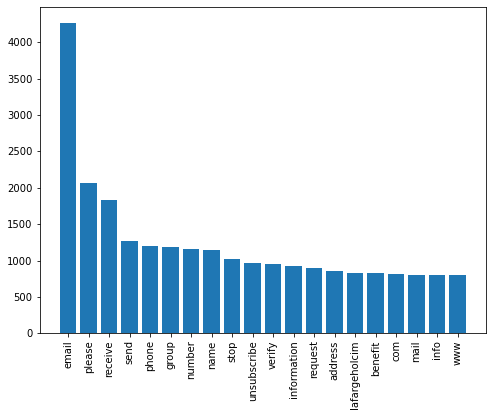

Wall time: 352 ms


In [13]:
%time mostrar_frecuencias(datos)

In [14]:
stemmer=nltk.stem.SnowballStemmer("english")

In [15]:
%time datos['tokens']=datos['tokens'].apply(lambda tokens: [stemmer.stem(w) for w in tokens])

Wall time: 1.3 s


Numero de tokens: 5933
1 ('email', 4271)
2 ('pleas', 2069)
3 ('receiv', 1839)
4 ('send', 1275)
5 ('phone', 1195)
6 ('group', 1189)
7 ('number', 1152)
8 ('name', 1150)
9 ('stop', 1018)
10 ('unsubscrib', 973)
11 ('verifi', 961)
12 ('inform', 960)
13 ('request', 900)
14 ('thank', 875)
15 ('address', 856)
16 ('lafargeholcim', 829)
17 ('benefit', 829)
18 ('com', 818)
19 ('mail', 800)
20 ('info', 796)


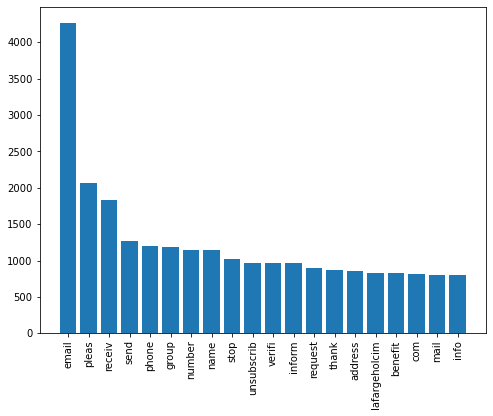

Wall time: 346 ms


In [16]:
%time mostrar_frecuencias(datos)

In [17]:
datos.to_csv('data_tokens.csv',index=False)